>### Name : Weerasinghe K.N. <br>Index No : 190672T

Question 1

In [135]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt
import scipy

(1.0536587958096146, 0.5027362938581157, 8.9805099037363)
(0.7102176259477795, 1.1918857031461245, 9.694319573015168)
(0.7381044478067816, 1.1359278316030799, 9.636036452060052)
(0.28118010865830934, 0.8151781425169881, 9.3705620749113)
(0.3810773278666117, 1.119193116690812, 9.658352478981731)
(0.32224106538946445, 1.1487640520845486, 9.69533452986714)
(0.5656441217553893, 0.4950410228690894, 9.351711596904327)
(0.33165376841206257, 0.49135139790289156, 9.533430552679544)
(-0.09181407912074185, 0.4846739461838774, 9.867902628623304)
(0.12324229704653251, 0.4880650511378838, 9.69717243379748)
(0.012161828936939576, 0.4863135006254194, 9.785139476631564)
(224.9206612727692, 233.56449772855254, 322.776398547359)
(140.75879197195775, 148.44401461698726, 203.24340762494575)
(0.13233475801254116, -0.02330222862630103, 10.018309414076443)
(0.15289329986360695, -0.14008761098000572, 10.013817123792878)
56


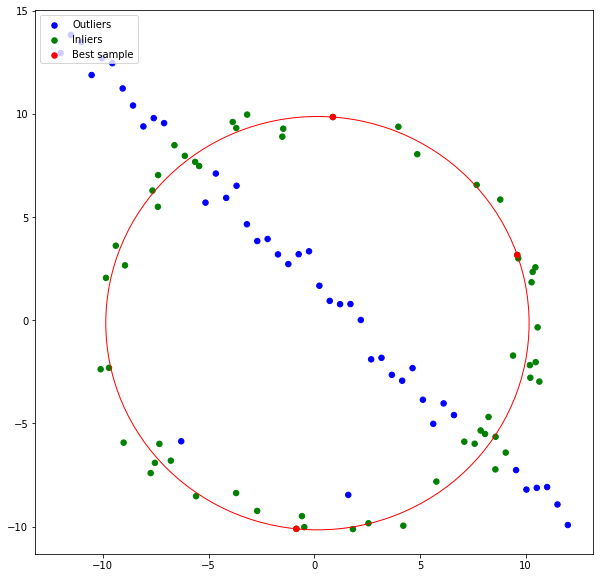

In [18]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn (half_n)
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b =-1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np.round(np.vstack((X_circ,X_line)),4)

def get_circle(x1,y1, x2,y2, x3,y3):
    x1y1 =x1**2 +y1**2
    x2y2 =x2**2 +y2**2
    x3y3 =x3**2 +y3**2

    mat = np.array([[x1y1, x1, y1, 1],[x2y2, x2, y2, 1],[x3y3, x3, y3, 1]])
    det_1 = np.round(np.linalg.det(np.hstack((mat[:,1].reshape(3,1),mat[:,2].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_2 =  np.round(-np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,2].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_3 =  np.round(np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,1].reshape(3,1),mat[:,3].reshape(3,1)))) ,5)
    det_4 =  np.round(-np.linalg.det(np.hstack((mat[:,0].reshape(3,1),mat[:,1].reshape(3,1),mat[:,2].reshape(3,1)))) ,5)

    x_c = (det_2/det_1)/(-2)
    y_c = (det_3/det_1)/(-2)
    r = np.sqrt(x_c**2 + y_c**2 - (det_4/det_1))

    return (x_c, y_c, r)

def RANSAC_circ(X,thrsh):
    inliners_max=[]
    def T_check(x,c):
        return np.sqrt((x[0]-c[0])**2+(x[1]-c[1])**2)-c[2]
    for i in range(len(X)-2):
        for j in range(i+1,len(X)-1):
            for k in range(j+1,len(X)):
                inliners=[]
                C=get_circle(X[i][0],X[i][1],X[j][0],X[j][1],X[k][0],X[k][1])
                if C==0:
                    continue
                else:
                    for x in X:
                        if abs(T_check(x,C))<thrsh:
                            inliners.append(list(x))
                    if len(inliners)>len(inliners_max):
                        print(C)
                        Output,inliners_max,Output_2=C,inliners.copy(),[X[i],X[j],X[k]]
    return Output,Output_2,inliners_max

threshold=1
RANSAC,BEST_sample,inliners=RANSAC_circ(X,threshold)
outliners=[]
for i in range(N):
    if (list(X[i]) not in inliners):
        outliners.append(list(X[i]))
print(len(inliners))
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(np.array(outliners)[:,0],np.array(outliners)[:,1],s= np.ones(len(outliners))*30 , color= 'blue', label = 'Outliers')
plt.scatter(np.array(inliners)[:,0],np.array(inliners)[:,1],s= np.ones(len(inliners))*30, color= 'green', label = 'Inliers')
plt.scatter(np.array(BEST_sample)[:,0],np.array(BEST_sample)[:,1],s= np.ones(len(BEST_sample))*30 , color= 'red', label = 'Best sample')
RANSAC=plt.Circle((RANSAC[0],RANSAC[1]),RANSAC[2],color="r",fill=False)
ax.add_artist(RANSAC)
plt.legend(loc="upper left")
plt.show()

Question 2

In [ ]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt
import scipy

In [ ]:
import cv2
Cordinates=[]
def click_event(event, x, y, flags, params):
    global Cordinates
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        Cordinates.append([x,y])
 
# driver function
if __name__=="__main__":
    wall = cv2.imread("Images/uom1.jpg")
    logo = cv2.imread("Images/entc1.png")
    cv2.imshow('image', wall)

    print("Click on 4 points with the edges of the morph and close the window")
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    size = logo.shape
    logo_corners = np.array([[0,0],[size[1] - 1, 0],[size[1] - 1, size[0] -1],[0, size[0] - 1 ]],dtype=float)
    homography_C=np.array([Cordinates[0],Cordinates[1],Cordinates[2],Cordinates[3]],dtype=float)
    h, status = cv2.findHomography(np.array(logo_corners),np.array(homography_C))
    warped = cv2.warpPerspective(logo, h, (wall.shape[1],wall.shape[0]))
    #cv2.fillConvexPoly(wall, homography_C.astype(int), 0, 16)
    #alpha = 0.5   #------------------>variable
    #beta = (1.0 - alpha)
    wall = cv2.addWeighted(wall,1, warped, 1,1)
    cv2.imshow('image', wall)
    cv2.imwrite("Final image - wall.jpg",wall)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(Cordinates)

Click on 4 points with the edges of the morph and close the window
[[129, 152], [552, 58], [550, 382], [130, 369]]


Question 3

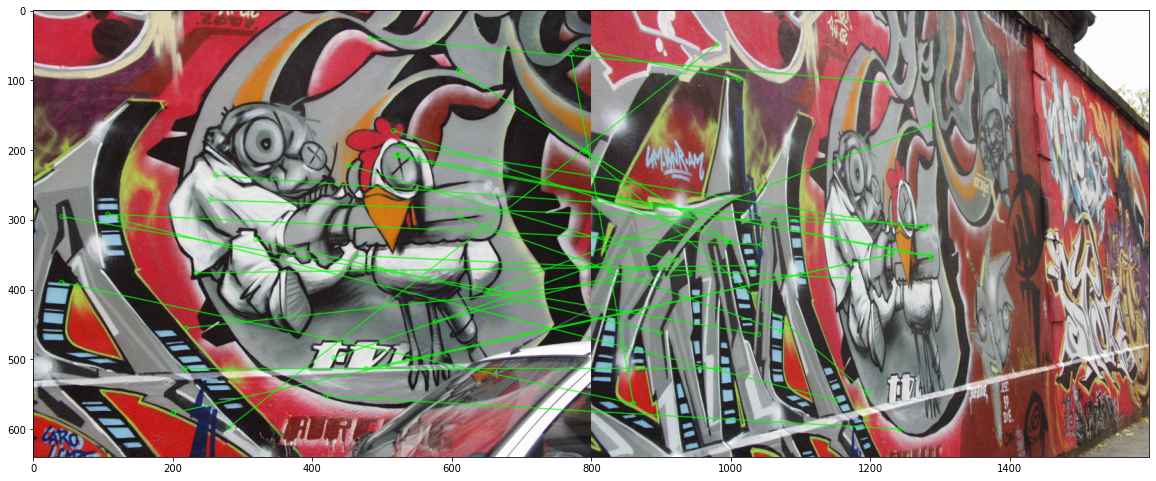

In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread("Graffiti/img1.ppm")          
img2 = cv.imread("Graffiti/img5.ppm")    

gimg1=cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gimg2=cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gimg1,None)
kp2, des2 = sift.detectAndCompute(gimg2,None)

bf_match = cv.BFMatcher()
matches = bf_match.knnMatch(des1,des2,k=2)

good ,pts1,pts2= [],[],[]
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[n.trainIdx].pt)

best , pts1 , pts2 = np.array(good) , np.array(pts1) , np.array(pts2)

draw_params = dict(matchColor = (0,255,0), 
                   singlePointColor = None,
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.subplots(figsize=(20,20))
plt.imshow(cv.cvtColor(img3,cv.COLOR_BGR2RGB))
plt.show()

In [19]:
def Homography(pts_1,pts_2):
    mean_1,mean_2 = np.mean(pts_1,axis=0) , np.mean(pts_2,axis=0)
    s_1 = len(pts1)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts_1-mean_1)**2,axis = 1))) 
    s_2 = len(pts2)*np.sqrt(2)/np.sum(np.sqrt(np.sum((pts_2-mean_2)**2,axis = 1))) 

    tx_1 , ty_1 , tx_2, ty_2 = -s_1*mean_1[0], -s_1*mean_1[1] , -s_2*mean_2[0] , -s_2*mean_2[1]
    T_1 = np.array(((s_1,0,tx_1),(0,s_1,ty_1),(0,0,1)))
    T_2 = np.array(((s_2,0,tx_2),(0,s_2,ty_2),(0,0,1)))

    x_i = []

    for i in range (len(pts_1)):
        x_11 = T_1 @ np.concatenate((pts_1[i],[1])).reshape(3,1)
        x_21 = T_2 @ np.concatenate((pts_2[i],[1])).reshape(3,1)

        x_i.append((-x_11[0][0],-x_11[1][0],-1,0,0,0,x_21[0][0]*x_11[0][0],x_21[0][0]*x_11[0][0],x_21[0][0]))        
        x_i.append((0,0,0,-x_11[0][0],-x_11[1][0],-1,x_21[1][0]*x_11[1][0],x_21[1][0]*x_11[1][0],x_21[1][0]))

    x_i = np.array(x_i)
    U , S , V = np.linalg.svd(x_i, full_matrices=True)
    h = np.reshape(V[-1],(3,3))
    H = np.linalg.inv(T_2) @ h @ T_1
    H = (1 / H.item(8)) * H
    return H

def distance_calc(pnt1,pnt2,homography):
    pt1 = np.array([pnt1[0],pnt1[1],1])
    pt2 = np.array([pnt2[0],pnt2[1],1])

    pt2_est = np.dot(homography,pt1.T)
    pt2_est = pt2_est * ( 1 / pt2_est[2])
    return np.linalg.norm(pt2.T - pt2_est)

def Homography_Ransac(pts1,pts2,s,error):
    tot_inliers = 0
    selected = None
    pts = np.hstack((pts1,pts2))
    req_iterations = np.log(1-(1-error))/np.log(1-(1-0.5)**s)

    for i in range(int(np.ceil(req_iterations))):
        np.random.shuffle(pts)
        points1,points1_rest = pts[:s,:2],pts[s:,:2]
        points2,points2_rest = pts[:s,2:],pts[s:,2:]

        H = Homography(points1,points2)
        inliers = [(points1_rest[j],points2_rest[j]) for j in range(len(points1_rest)) if distance_calc(points1_rest[j],points2_rest[j],H)<100]

        if len(inliers) > tot_inliers :
            tot_inliers = len(inliers)
            selected = np.array(inliers)
    H2 = Homography(selected[:,0],selected[:,1])
    return H2

H_with_RANSAC = Homography_Ransac(pts1,pts2,4,0.01)
print("Homography calculated using manual function : \n",H_with_RANSAC)

given_homography_file = open('Graffiti/H1to5p','r')

given_homography = []

for _ in range(3):
    given_homography.append(tuple(map(float,given_homography_file.readline().strip().split())))
given_homography = np.array(given_homography)

print("Given Homography :\n",given_homography)

Homography calculated using manual function : 
 [[-1.26899491e+00  1.26899491e+00  1.92343057e+02]
 [-2.43801212e+00  2.43801212e+00  3.69532375e+02]
 [-6.59756029e-03  6.59756029e-03  1.00000000e+00]]
Given Homography :
 [[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


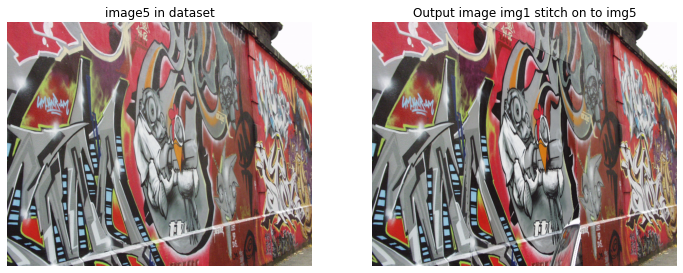

In [29]:
warped_1_gvn = cv.warpPerspective(img1,given_homography,(img2.shape[1],img2.shape[0]))
_,thresh = cv.threshold(warped_1_gvn,10,1,cv.THRESH_BINARY_INV)
thresh_im2 = np.multiply(thresh,img2)

output_img = cv.addWeighted(thresh_im2,1,warped_1_gvn,1,0)

fig,ax = plt.subplots(1,2,figsize = (12,10))
ax[0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[0].set_title("image5 in dataset")
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Output image img1 stitch on to img5")
ax[1].axis('off')
plt.savefig("images/q3_c.png")
plt.show()